# KNN Predictive model (Data Fake Bills / Uang Palsu)

In [2]:
#import Library
import pandas as pd
import numpy as np

## 1. Import dataset

In [3]:
data = pd.read_csv('fake_bills.csv', sep=';')


In [4]:
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


## 2. Data Exploration

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
data.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## 3. Data Cleaning

Cek Apakah ada missing values pada data

In [7]:
data.isna().any()

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low       True
margin_up       False
length          False
dtype: bool

In [8]:
#menghitung jumlah na
data.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
#mengambil data na
datamising = data[data['margin_low'].isna()]
datamising

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [10]:
#berapa persen na dari keseluruhan data
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

is_genuine      0.000000
diagonal        0.000000
height_left     0.000000
height_right    0.000000
margin_low      2.466667
margin_up       0.000000
length          0.000000
dtype: float64

dari 100% kesuluruhan data hanya 2.5% data pada kolom margin low adalah NA/null. termasuk aman untuk menghapus na values

In [11]:
data = data.dropna()
data.isna().any()

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low      False
margin_up       False
length          False
dtype: bool

Melakukan Sedikit Formating Data

merubah kolom is_genuine yang dijadikan sebagai label menjadi kolom klasifikasi dengan row true = 'Asli' dan false = 'palsu'

In [12]:
#rename
data = data.rename(columns={'is_genuine' : 'klasifikasi'})
#change row in klasifikasi
data['klasifikasi'] =  data.klasifikasi.apply(lambda x : 'Asli' if x==True else 'Palsu')
data

,klasifikasi,diagonal,height_left,height_right,margin_low,margin_up,length
0,Asli,171.81,104.86,104.95,4.52,2.89,112.83
1,Asli,171.46,103.36,103.66,3.77,2.99,113.09
2,Asli,172.69,104.48,103.50,4.40,2.94,113.16
3,Asli,171.36,103.91,103.94,3.62,3.01,113.51
4,Asli,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,Palsu,171.75,104.38,104.17,4.42,3.09,111.28
1496,Palsu,172.19,104.63,104.44,5.27,3.37,110.97
1497,Palsu,171.80,104.01,104.12,5.51,3.36,111.95
1498,Palsu,172.06,104.28,104.06,5.17,3.46,112.25


## 4. Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Melihat distribusi data / persebaran. apakah perseberan datanya mendekati mean ataupun median valuenya atau biasa disebut dengan Normal distribution. ataukah data tersebut menampilkan kemiringan dikarenakan terdapat nilai yang sama pada ujung data yang akan menganggu analysis dan modeling

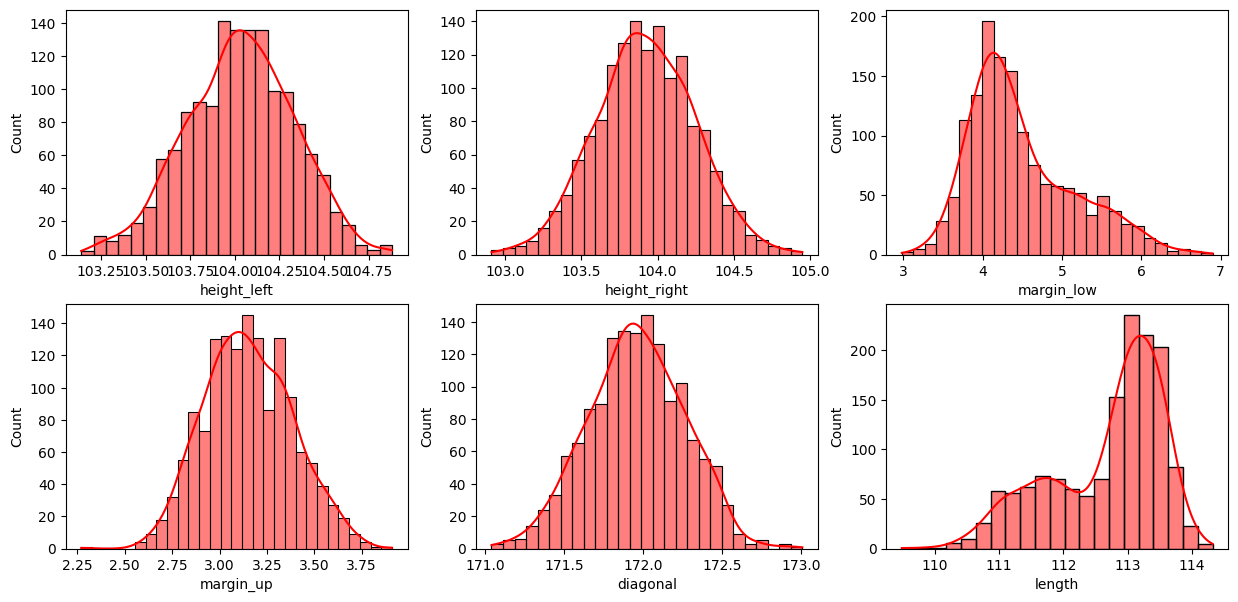

In [34]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = data,x = "height_left",kde = True,ax = axes[0,0],color='red')
fig2 = sns.histplot(data = data,x = "height_right",kde = True,ax = axes[0,1],color='red')
fig3 = sns.histplot(data = data,x = "margin_low",kde = True,ax = axes[0,2],color='red')
fig4 = sns.histplot(data = data,x = "margin_up",kde = True,ax = axes[1,0],color='red')
fig5 = sns.histplot(data = data,x = "diagonal",kde = True,ax = axes[1,1],color='red')
fig6 = sns.histplot(data = data,x = "length",kde = True,ax = axes[1,2],color='red')
plt.show()

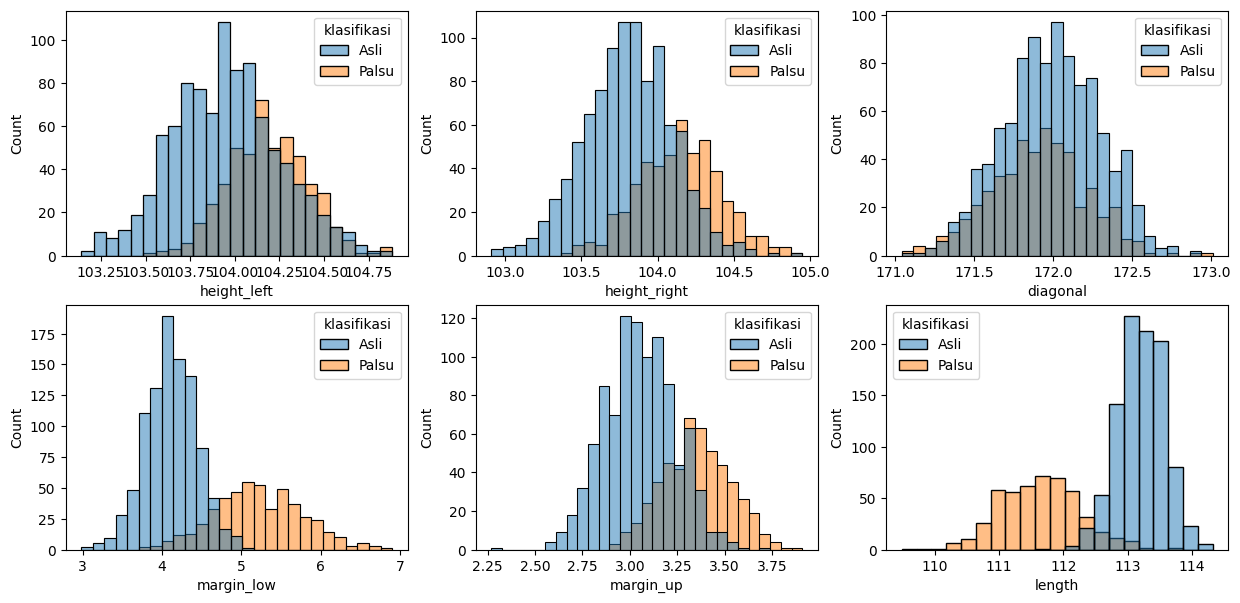

In [15]:
fig,axes = plt.subplots(2,3,figsize=(15,7))
fig1 = sns.histplot(data = data,x = "height_left",hue = 'klasifikasi',ax = axes[0,0])
fig2 = sns.histplot(data = data,x = "height_right",hue = 'klasifikasi',ax = axes[0,1])
fig3 = sns.histplot(data = data,x = "diagonal",hue = 'klasifikasi',ax = axes[0,2])
fig4 = sns.histplot(data = data,x = "margin_low",hue = 'klasifikasi',ax = axes[1,0])
fig5 = sns.histplot(data = data,x = "margin_up",hue = 'klasifikasi',ax = axes[1,1])
fig6 = sns.histplot(data = data,x = "length",hue = 'klasifikasi',ax = axes[1,2])
plt.show()

Mencari tahu porsi uang asli dan palsu pada data

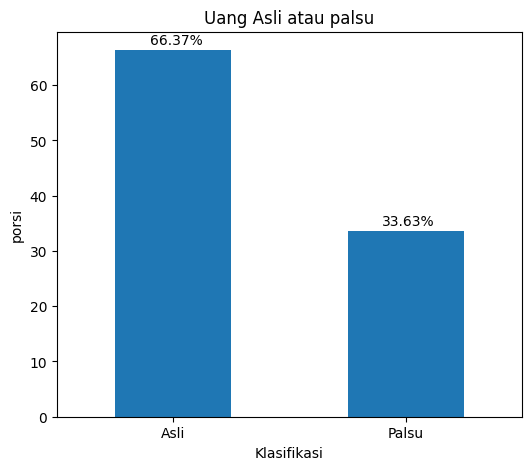

In [16]:
plt.figure(figsize=(6,5))
plt.title('Uang Asli atau palsu')
plt.xlabel('Klasifikasi')
plt.ylabel('porsi')

ax = (data.klasifikasi.value_counts()/len(data)*100).sort_index().plot(kind="bar", rot=0)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

Mencari tahu korelasi dari semua variable pada data

C:\Windows\Temp\ipykernel_10608\481990898.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


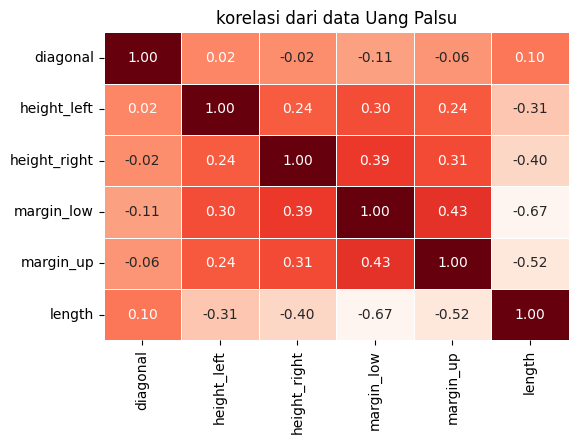

In [17]:
corr = data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, cmap='Reds',linewidths=0.5)
plt.title('korelasi dari data Uang Palsu')
plt.show()

## 5. Modeling KNN

Spliting data label dan fitur

In [18]:
label = data.klasifikasi
label


0        Asli
1        Asli
2        Asli
3        Asli
4        Asli
        ...  
1495    Palsu
1496    Palsu
1497    Palsu
1498    Palsu
1499    Palsu
Name: klasifikasi, Length: 1463, dtype: object

In [19]:
fitur = data.drop('klasifikasi', axis=1)
fitur

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


Generate random row untuk membuat label train dan test begitu juga dengan fitur train dan test

In [20]:
#import library
from sklearn.model_selection import train_test_split
fitur_train, fitur_test, label_train, label_test = train_test_split(fitur,label, test_size=0.2, random_state=5)

modeling

In [21]:
#import library
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Learning

In [22]:
knn.fit(fitur_train,label_train)

KNeighborsClassifier(n_neighbors=1)

Tes model dengan data buatan

In [38]:
#membuat data karangan
uangmisterius = np.array([[171.73,103.92,103.74,4.43,2.78,112.98]])
uangmisterius

array([[171.73, 103.92, 103.74,   4.43,   2.78, 112.98]])

In [39]:
pred_uangmisterius = knn.predict(uangmisterius)

c:\Users\Ibrahim Saputra\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [40]:
pred_uangmisterius

array(['Asli'], dtype=object)

Prediksi dari data test

In [26]:
labelpredict_test = knn.predict(fitur_test)

In [27]:
# menyatukan predict dengan test menjadi 1 data frame untuk membuat confusion matrix
data_pred ={
    'label_actual' :label_test,
    'label_predict' : labelpredict_test
}
data_pred = pd.DataFrame(data_pred)

In [32]:
confusion_matrix = pd.crosstab(data_pred['label_actual'], data_pred['label_predict'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,Asli,Palsu
Actual,,
Asli,186,1
Palsu,5,101


In [29]:
#berapa persen tebakan model dengan data actual
np.mean(labelpredict_test == label_test)

0.9795221843003413